In [1]:
from scipy.io import loadmat 
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

In [2]:
data=loadmat('machine-learning-ex3\ex3\ex3data1.mat')

In [3]:
X=data['X']
y=data['y']
X.shape

(5000, 400)

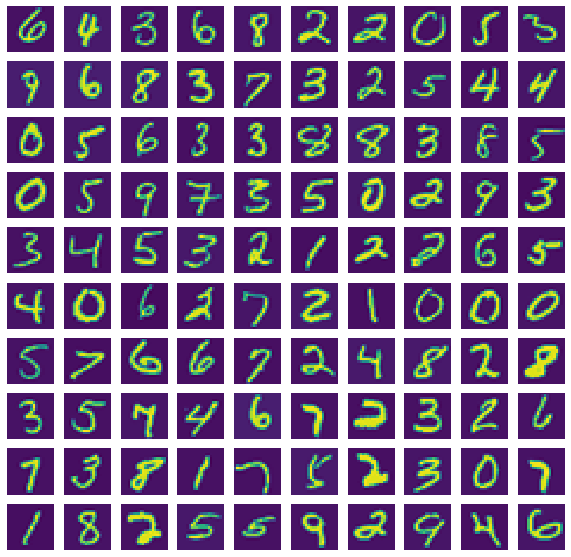

In [4]:
#visualizaing the data
_,axarr = plt.subplots(10,10,figsize=(10,10))
for i in range(10):
    for j in range(10):
        axarr[i][j].imshow(X[np.random.randint(X.shape[0])].reshape((20,20),order='F'))
        axarr[i][j].axis('off')
        
                           

In [5]:
#Adding the intercept form 
m=len(y)
ones=np.ones((m,1))
X=np.hstack((ones,X))
m,n=X.shape

In [6]:
print(X.shape,y.shape)

(5000, 401) (5000, 1)


In [7]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [61]:
def costfunction(theta,X,y,lmbda):
    m = len(y)
    temp1 = np.multiply(y, np.log(sigmoid(np.dot(X, theta))))
    temp2 = np.multiply(1-y, np.log(1-sigmoid(np.dot(X, theta))))
    return (np.sum(temp1 + temp2) / (-m)) + np.sum(theta[1:]**2) * lmbda / (2*m)

In [9]:
def gradient(theta,X,y,lmbda):
    m=len(y)
    temp = sigmoid(np.dot(X, theta)) - y
    temp = np.dot(temp.T, X).T / m + theta * lmbda / m
    temp[0] = temp[0] - theta[0] * lmbda / m
    return temp

In [24]:
lmbda =0.1
k=10
theta=np.zeros((k,n))

for i in range(k):
    digit_class=i if i else 10
    theta[i]=opt.fmin_cg(f=costfunction,x0=theta[i],fprime=gradient,args=(X,(y==digit_class).flatten(),lmbda),maxiter=50)

         Current function value: 0.009110
         Iterations: 50
         Function evaluations: 182
         Gradient evaluations: 182
         Current function value: 0.014069
         Iterations: 50
         Function evaluations: 180
         Gradient evaluations: 180
         Current function value: 0.057151
         Iterations: 50
         Function evaluations: 140
         Gradient evaluations: 140
         Current function value: 0.061954
         Iterations: 50
         Function evaluations: 139
         Gradient evaluations: 139
         Current function value: 0.037404
         Iterations: 50
         Function evaluations: 154
         Gradient evaluations: 154
         Current function value: 0.063881
         Iterations: 50
         Function evaluations: 131
         Gradient evaluations: 131
         Current function value: 0.020031
         Iterations: 50
         Function evaluations: 175
         Gradient evaluations: 175
         Current function value: 0.033830
      

In [21]:
np.dot(X,theta[0])

array([0., 0., 0., ..., 0., 0., 0.])

In [23]:
print(X.shape,theta[0].shape)

(5000, 401) (401,)


In [163]:
pred = np.argmax(X @ theta.T, axis = 1)
pred = [e if e else 10 for e in pred]
np.mean(pred == y.flatten()) * 100

95.06

In [33]:
np.argmax(X@theta.T,axis=1)

array([0, 0, 0, ..., 9, 9, 7], dtype=int64)

Prediction: 9


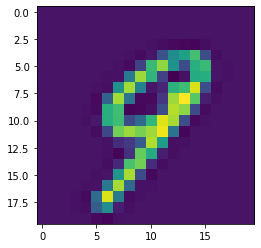

In [136]:
#test the prediction
def predictRandomDigit():
    random_digit = X[np.random.randint(X.shape[0])]
    #remove intercept term for reshape to work
    plt.imshow(random_digit[1:].reshape((20, 20), order='F'))
    predicted = np.argmax(sigmoid(np.dot(random_digit, theta.T)))
    print(f"Prediction: {predicted}")
predictRandomDigit()

In [147]:
theta[1]

array([-3.09427689e+00,  0.00000000e+00,  0.00000000e+00,  6.66751141e-05,
       -6.15968729e-04, -6.73407515e-04,  1.06942658e-03, -1.33510017e-02,
       -1.77660086e-04,  4.18498654e-04,  6.62442653e-04,  1.29339184e-04,
        2.60004942e-04,  1.15836499e-03,  1.18872341e-03,  3.88036181e-03,
        5.08639667e-03,  4.27856390e-04, -7.25005031e-05, -8.03196281e-08,
        0.00000000e+00, -2.40504306e-08,  8.29927400e-06, -8.54513167e-04,
        6.97389871e-03,  8.04118157e-03,  1.96724163e-03, -1.82581868e-02,
       -1.44382353e-03, -2.42977990e-03, -1.10021457e-02, -1.56406449e-03,
       -2.77716963e-03, -1.23500802e-02, -8.03498341e-03, -3.54604543e-02,
       -4.84677930e-02,  3.92327291e-03,  7.26461468e-03,  3.25853974e-04,
        1.57723485e-04,  2.03658233e-07, -2.26740416e-04,  3.89455698e-04,
        2.02644541e-02,  4.51883382e-02,  6.44782571e-02,  6.45235197e-02,
       -5.13198587e-02, -7.52364745e-02, -2.42558774e-02, -3.00093816e-02,
       -3.58670620e-03, -

In [44]:
(X@theta.T).shape

(5000, 10)

In [47]:
t=np.array((2,3,4,5,6))

In [51]:
X.shape,theta.shape

((5000, 401), (10, 401))

In [58]:
(X@theta.T)[0][:]

array([ 10.07231129, -32.70979503,  -7.97306998, -10.81877208,
       -18.74266163,  -7.10525496, -15.0758762 , -14.66993993,
       -11.41351806,  -6.37025111])